In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
#1.read csv file to dataframe then change it to a numpy array

data=pd.read_csv(r"/content/drive/MyDrive/train.csv")
data=np.array(data)
row,column=data.shape

#2.shuffle the data
np.random.shuffle(data)

#3.splitting the dataset

#3.1 split to test set
data_test=data[0:1000].T
label_test=data_test[0]
pixelval_test=data_test[1:column]
#3.1.1 to make the pixel value from 0 to 1.pixel value is stored in 8 bit integer(2^8 -> 0 to 255) so we divide 255
pixelval_test=pixelval_test/255

#3.2 split to train set
data_train=data[1000:row].T
label_train=data_train[0]
pixelval_train=data_train[1:column]
#3.2.1 to make the pixel value from 0 to 1 is stored in 8 bit integer(2^8 -> 0 to 255)
pixelval_train=pixelval_train/255


neural network algorithm:


1.   Initialize Weight and bias with values from (-0.5,0.5)
2.   Feed Forward : **A1=*ReLU*(X&#215;W1)+B1 , A2=*Softmax*(A1&#215;W2)+B2**
     
     **A1=value of hidden layer**
     
     **W1=Weight from input layer to hidden layer**

     **X=input data**

     **B1=bias of hidden layer nodes**

     **A2=value of output layer**
     
     **W2=Weight from hidden layer to output layer**
     
     **B2=bias of hidden layer nodes**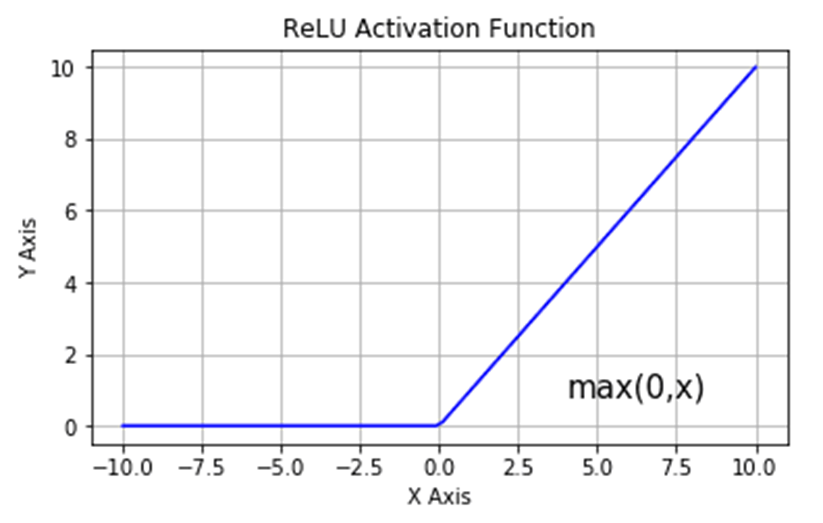
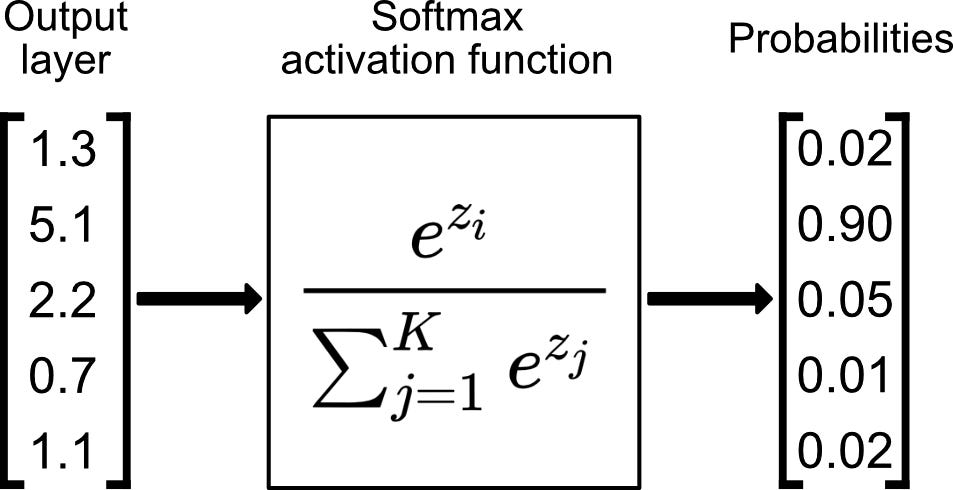

3.**Back propogation:Find the derivative of the cost function in respect of the weight and bias**

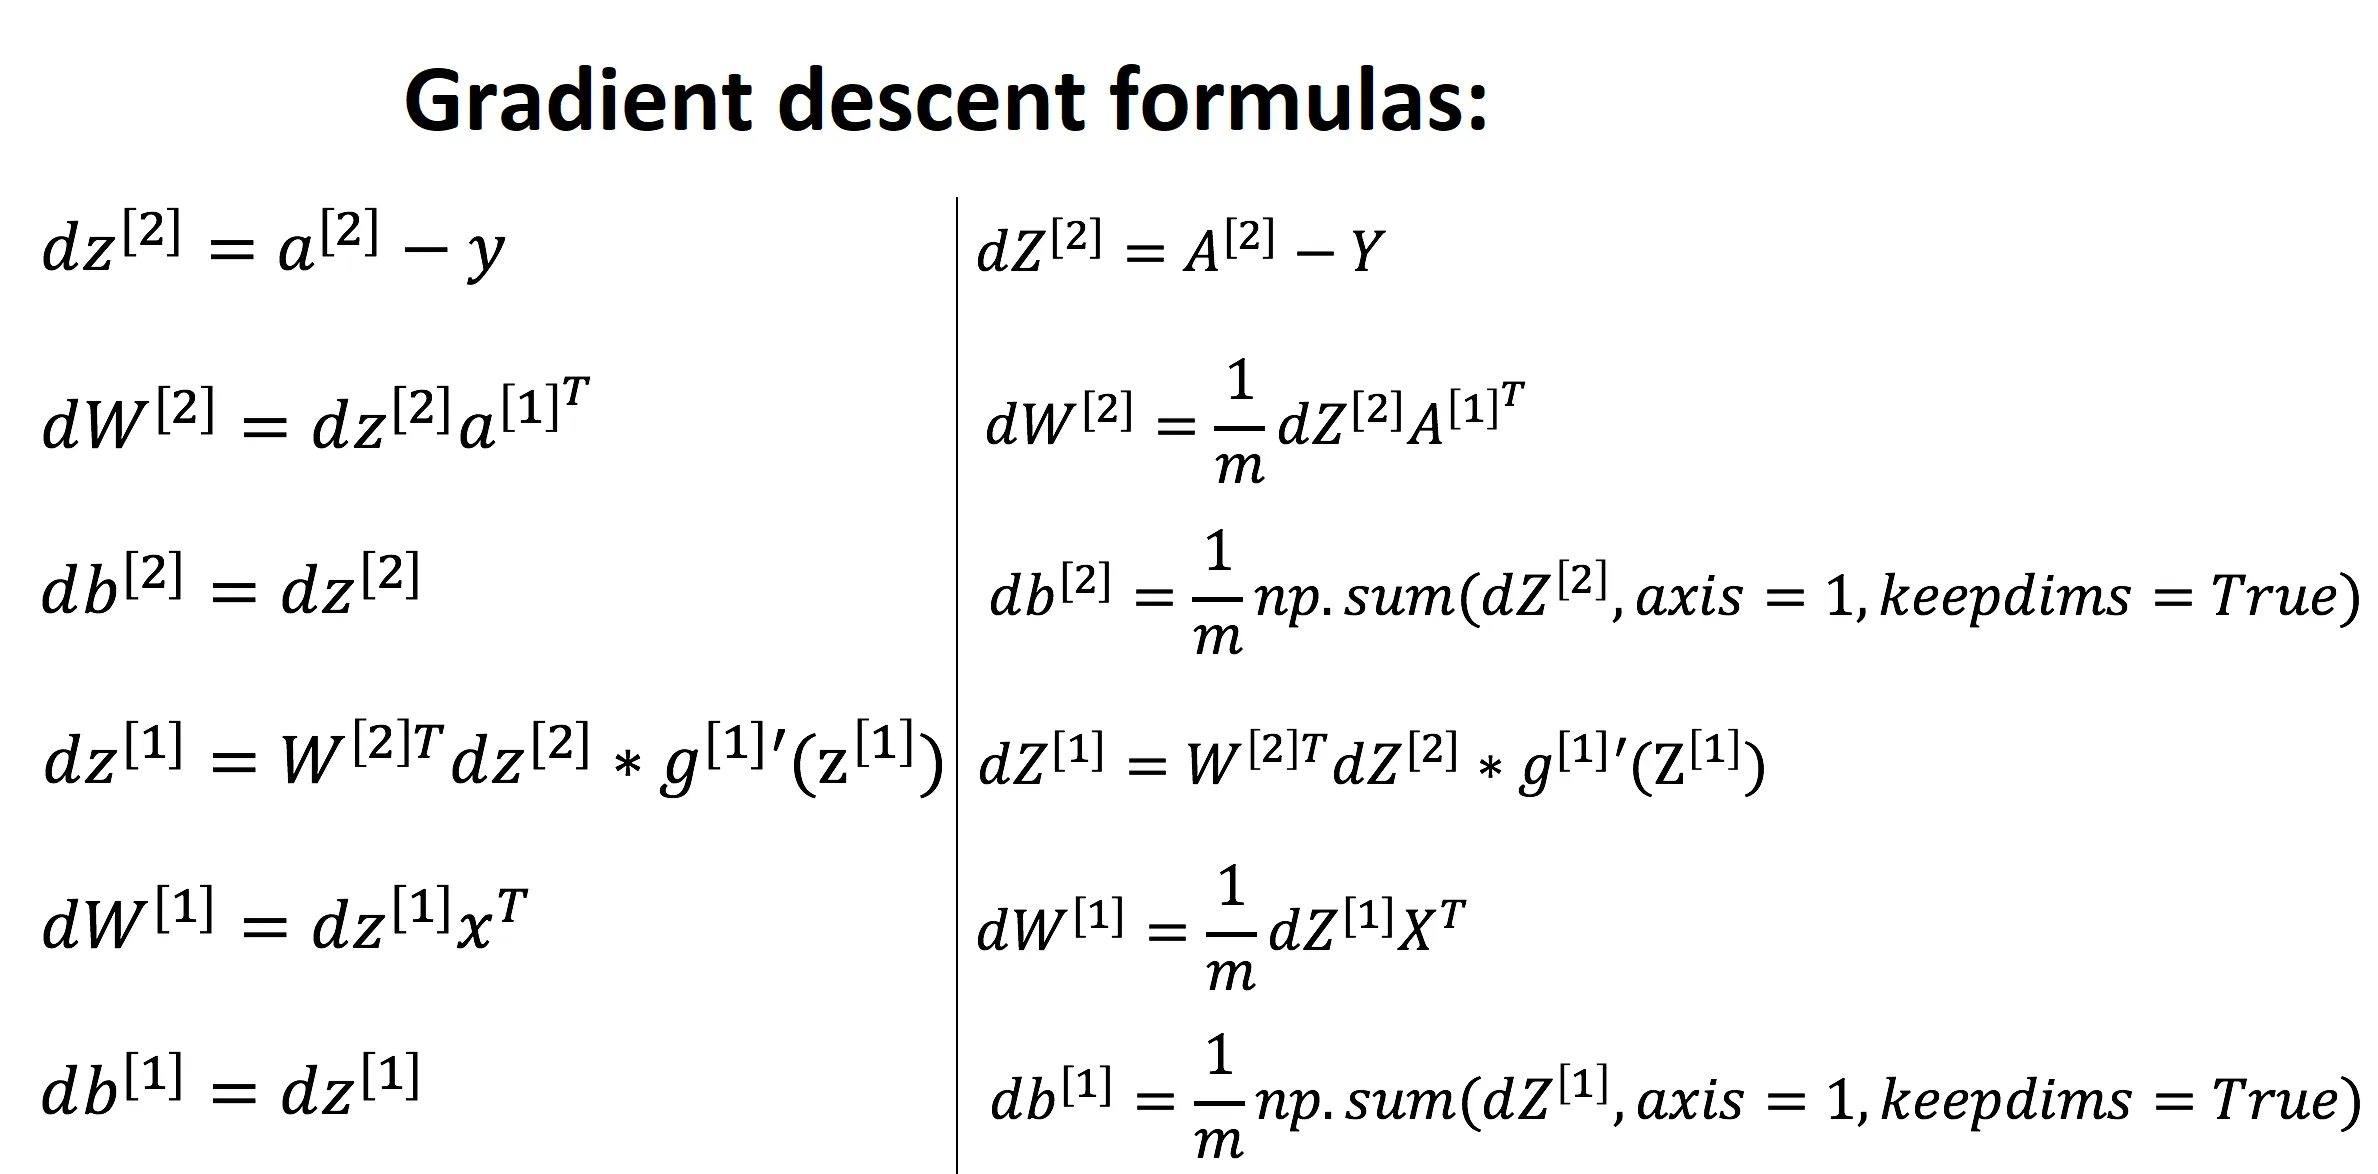



In [ ]:
'''
use to randomize weight and bias to start to train the nn
W_I_H is the weight from input layer to hidden layer
B_I_H is the bias from input layer to hidden layer
W_H_O is the weight from hidden layer to input layer
B_H_O is the bias from hidden layer to input layer
'''


def init_params():
    W_I_H = np.random.rand(10,784) -0.5
    B_I_H = np.random.rand(10,1)   -0.5
    W_H_O = np.random.rand(10,10) -0.5
    B_H_O = np.random.rand(10,1)   -0.5
    return W_I_H , B_I_H , W_H_O , B_H_O

'''
rectified linear unit activation function negative nodes does not activate
'''

def relu(x):
    return np.maximum(0,x)



'''
activate output layer using softmax formula: https://en.wikipedia.org/wiki/Softmax_function#Definition
'''

def softmax(z):
    return np.exp(z)/np.sum(np.exp(z),axis=0)

'''
x is pixel value

from input layer to hidden layer 1
we multiply the matrix of pixel value and weight then plus with the bias to get a matrix of the value in the nodes of layer 1
then use ReLU to generalize the value
formula: A1=ReLU(W_W_I_H*A1+B1)
    A1=Value of a node in layer 1(matrix shape(10,1))
    W_I_H=Weight from input layer nodes to hidden layer nodes(matrix shape(10,784))
    B_I_H= Bias from input layer nodes to hidden layer nodes(matrix shape (10,1))
'''
def feed_forward(W_I_H,B_I_H,W_H_O,B_H_O,x):
    Z1=W_I_H.dot(x)+B_I_H
    A1=relu(Z1)
    Z2=W_H_O.dot(A1)+B_H_O
    A2=softmax(Z2)
    return Z1,A1,Z2,A2
'''
One hot encode the label to make it easy to compare with output values
'''
def one_hot(Y):
    one_hot_Y = np.zeros((Y.max()+1,Y.size))
    one_hot_Y[Y,np.arange(Y.size)] = 1
    return one_hot_Y

def relu_diff(Z):
    return Z > 0
'''
dA is the partial diff of the cost function with respect to a
and so on
the math is kinda hard some calculus shenanigans to get these formula
'''
def backward_prop(Z1,Z2,A1,A2,W_I_H,W_H_O,B_I_H,B_H_O,data,label ,row):
    one_hot_Y = one_hot(label)
    dZ2 =2*(A2 - one_hot_Y)
    dW_H_O = 1 / row * dZ2.dot(A1.T)
    dB_H_O = 1 / row * np.sum(dZ2,1)
    dZ1 = W_H_O.T.dot(dZ2) * relu_diff(Z1)
    dW_I_H = 1 / row * dZ1.dot(data.T)
    dB_I_H = 1/ row * np.sum(dZ1,1)
    return dW_I_H, dB_I_H, dW_H_O, dB_H_O
'''
update parameter using the derivative from backward propogation
'''
def update_param(learning_rate, W_I_H, B_I_H, W_H_O, B_H_O, dW_I_H, dB_I_H, dW_H_O, dB_H_O):
    W_I_H -= learning_rate * dW_I_H
    B_I_H -= learning_rate * np.reshape(dB_I_H, ((10,1)))
    W_H_O -= learning_rate * dW_H_O
    B_H_O-= learning_rate * np.reshape(dB_H_O, ((10,1)))
    return W_I_H,B_I_H,W_H_O,B_H_O
'''
return an array the index of the max value in each rows
'''
def get_predictions(A2):
    return np.argmax(A2, 0)
'''
return the percentage of
'''
def get_accuracy(predictions, Y):
    return (np.sum(predictions == Y)/Y.size)*100

'''
finding the local minimum of the cost function every fuctions lead to this
'''
def train(Data,Label,learning_rate,iterations):
   _,row = Data.shape
   W_I_H, B_I_H, W_H_O, B_H_O = init_params()
   accuracy_array=[]
   for i in range(iterations):

        Z1, A1, Z2, A2 = feed_forward(W_I_H, B_I_H, W_H_O, B_H_O,Data)
        dW_I_H, dB_I_H, dW_H_O, dB_H_O = backward_prop(Z1,Z2,A1,A2,W_I_H,W_H_O,B_I_H,B_H_O,Data,Label,784)


        W_I_H, B_I_H, W_H_O, B_H_O = update_param(learning_rate,W_I_H, B_I_H, W_H_O, B_H_O, dW_I_H, dB_I_H, dW_H_O, dB_H_O)

        #show accuracy every iterations/10
        if (i+1) % int(iterations/10) == 0:
            print(f"Iteration: {i+1} / {iterations}")
            prediction = get_predictions(A2)
            print(f'{get_accuracy(prediction, Label)}')
        if (i+1)% int (iterations/100) == 0:
          prediction=get_predictions(A2)
          accuracy_array.append(get_accuracy(prediction,Label))

   return W_I_H, B_I_H, W_H_O, B_H_O,accuracy_array

def make_predictions(Data,W_I_H,B_I_H,W_H_O,B_H_O):
  _,_,_,A2=feed_forward(W_I_H,B_I_H,W_H_O,B_H_O,Data)
  predictions=get_predictions(A2)
  return predictions

def accuracy_graph(accuracy_array,iterations):
    x=np.linspace(0,iterations+1,100)
    plt.plot(x,accuracy_array)
    plt.xlabel("iterations")
    plt.ylabel("accuracy")
    plt.title("Accuracy Graph for each iterations")
    plt.show()







In [ ]:

W_I_H, B_I_H, W_H_O, B_H_O ,accuracy_array=train(pixelval_train, label_train, 0.01, 1000)



Iteration: 100 / 1000
80.46585365853659
Iteration: 200 / 1000
88.53902439024391
Iteration: 300 / 1000
87.75121951219512
Iteration: 400 / 1000
90.3658536585366
Iteration: 500 / 1000
91.90243902439025
Iteration: 600 / 1000
91.89024390243902
Iteration: 700 / 1000
92.40487804878049
Iteration: 800 / 1000
92.8219512195122
Iteration: 900 / 1000
92.9439024390244
Iteration: 1000 / 1000
92.90731707317073


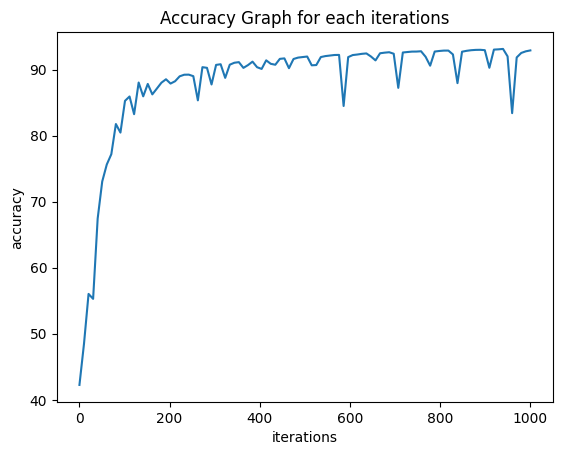

In [ ]:

accuracy_graph(accuracy_array,1000)

In [ ]:
predictions=make_predictions(pixelval_test,W_I_H,B_I_H,W_H_O,B_H_O)
accuracy=get_accuracy(predictions,label_test)
print("Accuracy on test set: ", accuracy ,"%")

Accuracy on test set:  92.0 %


Enter the index of a image(0-1000): 500
Label of image :  9
prediction of the network:  [9]


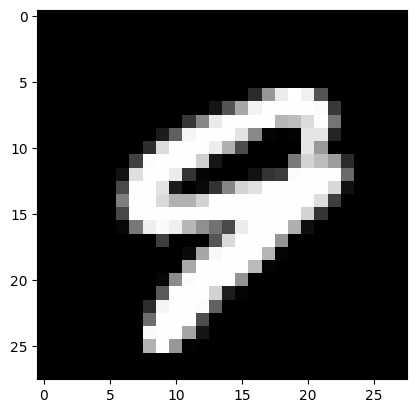

In [ ]:
index=int(input("Enter the index of a image(0-1000): "))
#None is used to create a new dimension
img=pixelval_test[:,index,None]

print("Label of image : ",label_test[index])
print("prediction of the network: ",make_predictions(img,W_I_H,B_I_H,W_H_O,B_H_O))
img=img*255
plt.imshow(img.reshape((28,28)),cmap='gray')
plt.show()


